In [43]:
import autograd.numpy as anp
from autograd import grad
import matplotlib.pyplot as plt

## Question 3.5

In [44]:
def gradient_descent(alpha, max_its, w_init):

    # Define the cost and its gradient functions
    def g(w):
        return 1/50 * (w**4 + w**2 + 10*w)

    def grad_g(w):
        return 1/50 * (4*w**3 + 2*w + 10)

    # Initialize variables
    w = w_init
    cost_history = [g(w)]

    for _ in range(max_its):
        w -= alpha * grad_g(w)  # Update step
        cost_history.append(g(w))  # Store the cost
    
    return cost_history


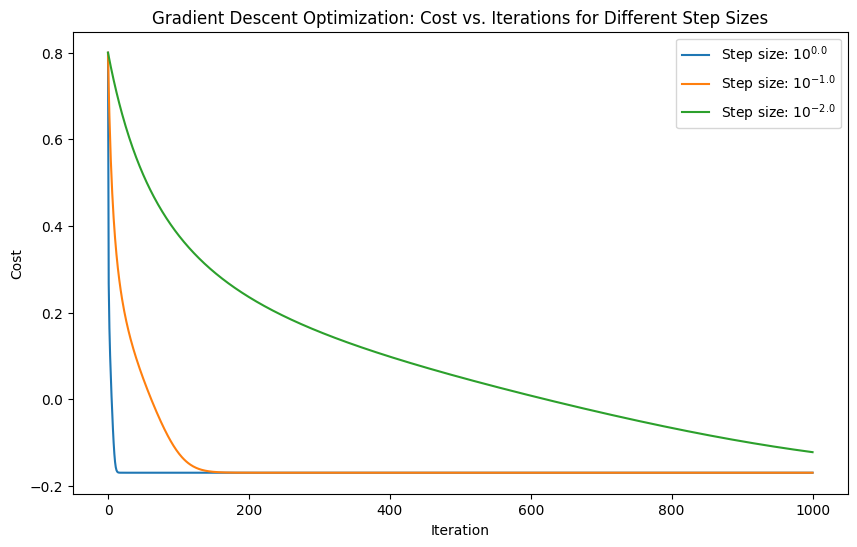

In [45]:
initial_weight = 2.0
iterations = 1000
step_sizes = [10**0, 10**(-1), 10**(-2)]
histories = []

for step_size in step_sizes:
    histories.append(gradient_descent(step_size, iterations, initial_weight))

plt.figure(figsize=(10, 6))
for index, history in enumerate(histories):
    plt.plot(history, label=f'Step size: $10^{{{np.log10(step_sizes[index])}}}$')

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Gradient Descent Optimization: Cost vs. Iterations for Different Step Sizes')
plt.legend()
plt.show()

## Question 3.8

In [46]:
def gradient_descent(function_to_optimize, step_size, max_iterations, initial_weight):

    compute_gradient = grad(function_to_optimize)

    weights_history = [initial_weight]
    costs_history = [function_to_optimize(initial_weight)]

    for _ in range(max_iterations):
        current_gradient = compute_gradient(weights_history[-1])

        updated_weight = weights_history[-1] - step_size * current_gradient

        weights_history.append(updated_weight)
        costs_history.append(function_to_optimize(updated_weight))

    return weights_history, costs_history


In [47]:
def squared_norm(w):

    return anp.dot(w.T, w)[0, 0]

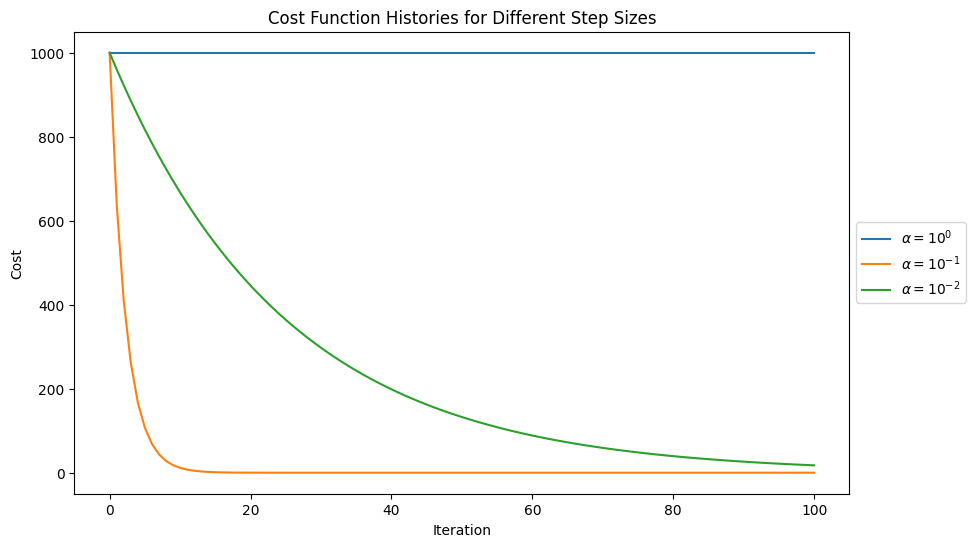

In [48]:
def g(w):
    return squared_norm(w)

N = 10
initial_weight = 10 * anp.ones((N, 1))
max_iterations = 100
step_sizes = [10**0, 10**(-1), 10**(-2)]

results = []
for alpha in step_sizes:
    weights_history, costs_history = gradient_descent(g, alpha, max_iterations, initial_weight)
    results.append(costs_history)

def plot_cost_histories(cost_histories, labels):

    plt.figure(figsize=(10, 6))
    for history, label in zip(cost_histories, labels):
        plt.plot(history, label=label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost Function Histories for Different Step Sizes')
    plt.show()

labels = [r'$\alpha = 10^{0}$', r'$\alpha = 10^{-1}$', r'$\alpha = 10^{-2}$']

plot_cost_histories(results, labels)
